In [1]:
import numpy as np
import do_mpc
from DifferentialDriveExperiment import DifferentialDriveExperiment
import yaml
import baseline_integration as bi
from datetime import datetime
from differential_drive_env_v2_wrappers import DifferentialDriveEnvV2Unscaled, RLAgentUnscalingWrapper
#HERE import the current baseline Env class 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/root/miniconda3/envs/dompc_dev/lib/python3.6/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
#HERE insert the ppo2 model associated to the actual wheel radius value:
#ppo2_meters_redesigned_1 is a model trained on the env in baseline_integration.py where L=0.5 and w=0.15
ppo2_model_name_w_012 = "ppo2_gaussian_012"
ppo2_model_name_w_016 = "ppo2_gaussian_016"
ppo2_model_name_w_017 = "ppo2_gaussian_017"
#HERE insert  the right Env class for each trained model
env_class_name_w_012 = DifferentialDriveEnvV2Unscaled
env_class_name_w_016 = DifferentialDriveEnvV2Unscaled
env_class_name_w_017 = DifferentialDriveEnvV2Unscaled
#HERE if needed declare the Agent wrapper and its params
rl_agent_wrapper_class = RLAgentUnscalingWrapper
rl_agent_wrapper_params = {"state_scaling_factors": [1.0, 1.0, np.pi], "action_scaling_factors": [3.0, 3.0]}
#HERE change the initial position accordingly
init_robot_pose = {'x': 0.3, 'y': 0.3, 'theta': np.pi}
#HERE wheel radii values and probabilities
wheel_radii_v = [0.12,0.16,0.17]
#gaussian pdf centered on 0.15 with covariance 0.01
wheel_radii_p = [0.443,24.197,5.399]


LOAD AND RUN init_pose before setup [0.3, 0.3, 3.141592653589793]
Loading a model without an environment, this model cannot be trained until it has a valid environment.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



LOAD AND RUN init_pose before run model [0.3, 0.3, 3.141592653589793]
run_model() init_pose param = [0.3, 0.3, 3.141592653589793]
env.init_position after env reset() = [0.3, 0.3, 1.0]
obs returned by env.reset() = [0.3, 0.3, 3.141592653589793]
Here a trajectory of 201 obss e 200 actions from the model ppo2_gaussian_012 corresponding to hp: L 0.5 and radius 0.12
X: [0.3, 0.3, 3.141592653589793]
X: [0.2964, 0.3, 3.141592653589793]
X: [0.2928, 0.3, 3.141592653589793]
X: [0.2928, 0.3, 3.127192653589793]
X: [0.28920037324155035, 0.3000518382084282, 3.127192653589793]
X: [0.28920037324155035, 

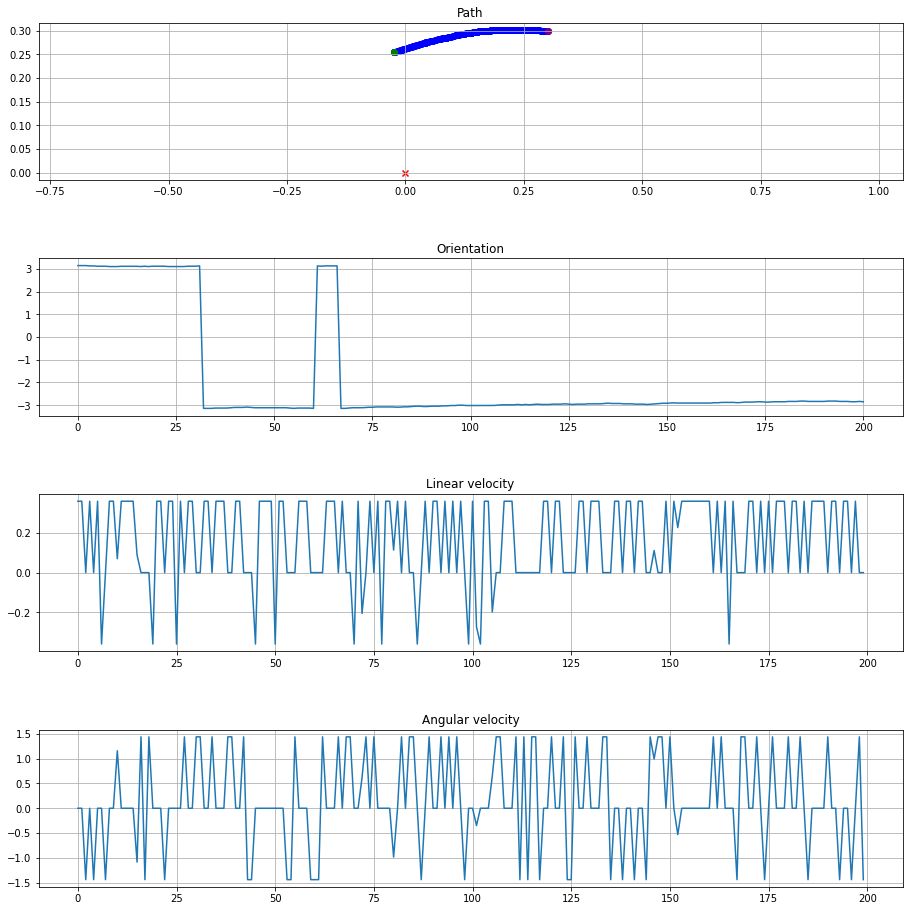

In [3]:
#HERE if wrapper Agent is needed pass it and its params to load and run
obss_w012, actions_w012 = bi.load_and_run_model(ppo2_model_name_w_012,200,0.5,0.12,env_class_name_w_012,list(init_robot_pose.values()),
                                               rl_agent_wrapper_class, rl_agent_wrapper_params)
print("Here a trajectory of {} obss e {} actions from the model {} corresponding to hp: L {} and radius {}".format(len(obss_w012),
                                                    len(actions_w012),ppo2_model_name_w_012, 0.5,0.12))
for obs in obss_w012:
    print("X: {}".format(obs))
for act in actions_w012:
    print("Commands: {}".format(act))
bi.show_rl_trajectory(obss_w012,actions_w012,0.5,0.12)

LOAD AND RUN init_pose before setup [0.3, 0.3, 3.141592653589793]
Loading a model without an environment, this model cannot be trained until it has a valid environment.
LOAD AND RUN init_pose before run model [0.3, 0.3, 3.141592653589793]
run_model() init_pose param = [0.3, 0.3, 3.141592653589793]
env.init_position after env reset() = [0.3, 0.3, 1.0]
obs returned by env.reset() = [0.3, 0.3, 3.141592653589793]
Here a trajectory of 201 obss e 200 actions from the model ppo2_gaussian_016 corresponding to hp: L 0.5 and radius 0.16
X: [0.3, 0.3, 3.141592653589793]
X: [0.3, 0.3, -3.122392653589793]
X: [0.3, 0.3, -3.103192653589793]
X: [0.2981964869070228, 0.29993071103697017, -3.0912120280080515]
X: [0.2981964869070228, 0.29993071103697017, -3.0720120280080514]
X: [0.2981964869070228, 0.29993071103697017, -3.0528120280080513]
X: [0.2981964869070228, 0.29993071103697017, -3.033612028008051]
X: [0.2976826118086513, 0.2998750058096725, -3.016479570274897]
X: [0.29292013070983597, 0.299276028528

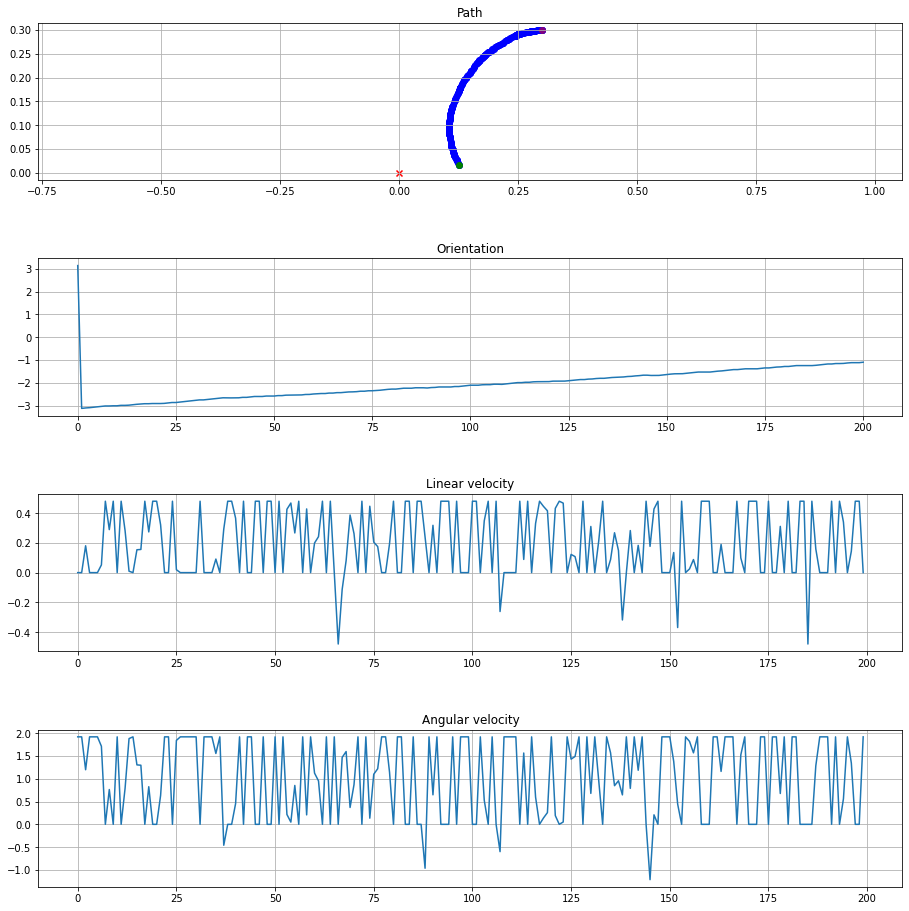

In [4]:
#HERE if wrapper Agent is needed pass it and its params to load and run
obss_w016, actions_w016 = bi.load_and_run_model(ppo2_model_name_w_016,200,0.5,0.16,env_class_name_w_016,list(init_robot_pose.values()),
                                               rl_agent_wrapper_class, rl_agent_wrapper_params)
print("Here a trajectory of {} obss e {} actions from the model {} corresponding to hp: L {} and radius {}".format(len(obss_w016),
                                                    len(actions_w016),ppo2_model_name_w_016, 0.5,0.16))
for obs in obss_w016:
    print("X: {}".format(obs))
#for act in actions_w016:
#    print("Commands: {}".format(act))
bi.show_rl_trajectory(obss_w016,actions_w016,0.5,0.16)

In [ ]:
#HERE if wrapper Agent is needed pass it and its params to load and run
obss_w017, actions_w017 = bi.load_and_run_model(ppo2_model_name_w_017,200,0.5,0.17,env_class_name_w_017,list(init_robot_pose.values()),
                                               rl_agent_wrapper_class, rl_agent_wrapper_params)
print("Here a trajectory of {} obss e {} actions from the model {} corresponding to hp: L {} and radius {}".format(len(obss_w017),
                                                    len(actions_w017),ppo2_model_name_w_017, 0.5,0.17))
#for obs in obss:
#    print("X: {}".format(obs))
#for act in actions:
#    print("Commands: {}".format(act))
bi.show_rl_trajectory(obss_w017,actions_w017,0.5,0.17)

In [ ]:
#HERE put the right probabilities for the three scenarios
experiment = DifferentialDriveExperiment(axle_lengths_dict={'values':[0.5]}, 
                            wheel_radii_dict={'values':wheel_radii_v,'probs':wheel_radii_p,'true_value':0.15},
                            tracking_trajectories=[{'L':0.5,'r':0.12,
                                                    'policy_name':ppo2_model_name_w_012,
                                                    'env_class_name':env_class_name_w_012,
                                                    'agent_wrapper_class':rl_agent_wrapper_class,
                                                    'agent_wrapper_params':rl_agent_wrapper_params
                                                   },
                                                   {'L':0.5,'r':0.16,
                                                    'policy_name':ppo2_model_name_w_016,
                                                    'env_class_name':env_class_name_w_016,
                                                    'agent_wrapper_class':rl_agent_wrapper_class,
                                                    'agent_wrapper_params':rl_agent_wrapper_params
                                                   },
                                                   {'L':0.5,'r':0.17,
                                                    'policy_name':ppo2_model_name_w_017,
                                                    'env_class_name':env_class_name_w_017,
                                                    'agent_wrapper_class':rl_agent_wrapper_class,
                                                    'agent_wrapper_params':rl_agent_wrapper_params
                                                   }
                                                ])
experiment.setup_experiment(init_robot_pose)
#HERE the iteration
iteration_num = 1
#HERE the file where the results are saved:
date_prefix = datetime.today().strftime('%Y-%m-%d')
name_prefix = 'online_multi_track_probs'
output_file_prefix = date_prefix +'_'+name_prefix+'_'+str(iteration_num)
graphic_output_file = output_file_prefix+'.gif'
trajectory_info_log_file = output_file_prefix+'.yaml'
trajectory_image = output_file_prefix+'.png'
print("Those experiment will be saved in {} gif and its trajectory in {}".format(graphic_output_file,trajectory_info_log_file))

In [ ]:
mpc_graphics = do_mpc.graphics.Graphics(experiment.mpc.data)

In [ ]:
import matplotlib.pyplot as plt
plt.ion() # interactive mode on
from matplotlib import rcParams
rcParams['text.usetex'] = False
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.0
rcParams['axes.labelsize'] = 'xx-large'
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

# Include these parameters in order to have embedded animations without saving the gif file
rcParams["animation.html"] = "jshtml"
rcParams['animation.embed_limit'] = 2**128

In [ ]:
def differential_drive_robot(x, L, r):
    x = x.flatten()
    theta = x[2]
    
    length = 5
    endx = x[0] + length * np.cos(theta)
    endy = x[1] + length * np.sin(theta)
    
    # Get the x,y coordinates of the 2 bars for the given state x
    orientation_x = np.array([
        x[0],
        endx
    ])
    
    orientation_y = np.array([
        x[1],
        endy
    ])
    
    
    left_wheel = np.array([x[0]+L/2*np.cos(theta+np.pi/2),x[1]+L/2*np.sin(theta+np.pi/2)])
    right_wheel = np.array([x[0]+L/2*np.cos(theta-np.pi/2),x[1]+L/2*np.sin(theta-np.pi/2)])

    bar_x = np.array([
        right_wheel[0],
        left_wheel[0]        
    ])
    
    bar_y = np.array([
        right_wheel[1],
        left_wheel[1]     
    ])
    
    left_wheel_front = np.array([left_wheel[0]+r*np.cos(theta),left_wheel[1]+r*np.sin(theta)])
    left_wheel_back = np.array([left_wheel[0]-r*np.cos(theta),left_wheel[1]-r*np.sin(theta)])
    
    left_wheel_x = np.array([
        left_wheel_front[0],
        left_wheel_back[0]        
    ])
    
    left_wheel_y = np.array([
        left_wheel_front[1],
        left_wheel_back[1]     
    ])
    
    right_wheel_front = np.array([right_wheel[0]+r*np.cos(theta),right_wheel[1]+r*np.sin(theta)])
    right_wheel_back = np.array([right_wheel[0]-r*np.cos(theta),right_wheel[1]-r*np.sin(theta)])
    
    right_wheel_x = np.array([
        right_wheel_front[0],
        right_wheel_back[0]        
    ])
    
    right_wheel_y = np.array([
        right_wheel_front[1],
        right_wheel_back[1]     
    ])
    
    orientation = np.stack((orientation_x, orientation_y))
    bar = np.stack((bar_x, bar_y))
    left_wheel = np.stack((left_wheel_x,left_wheel_y))
    right_wheel = np.stack((right_wheel_x,right_wheel_y))
        
    return orientation, bar, left_wheel, right_wheel

In [ ]:
#help(do_mpc.controller.MPC.set_uncertainty_weights)

In [ ]:
from matplotlib.path import Path
from matplotlib.transforms import Affine2D
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection, PathCollection
def make_robot_shapepath(x, y, theta,L):
    robot_width = L
    robot_length = L
    robot_coords = np.array([[0, 0], [0, robot_width / 2.0], [robot_length, 0], [0, -robot_width / 2.0], [0, 0]])
    path = Path(robot_coords)
    trans = Affine2D().translate(x, y).rotate_around(x, y, theta)
    tpath = path.transformed(trans)
    return tpath

In [ ]:
%%capture

fig = plt.figure(figsize=(16,9))

ax1 = plt.subplot2grid((5, 2), (0, 0), rowspan=5)
ax2 = plt.subplot2grid((5, 2), (0, 1))
ax3 = plt.subplot2grid((5, 2), (1, 1))
ax4 = plt.subplot2grid((5, 2), (2, 1))
ax5 = plt.subplot2grid((5, 2), (3, 1))
ax6 = plt.subplot2grid((5, 2), (4, 1))

ax2.set_ylabel('$\omega_{left}$ [rad/s]')
ax3.set_ylabel('$\omega_{right}$ [rad/s]')
ax4.set_ylabel('$v$ [m/s]')
ax5.set_ylabel('$\omega$ [rad/s]')
ax6.set_ylabel('$distance$ [m]')

# Axis on the right.
for ax in [ax2, ax3, ax4, ax5, ax6]:
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    if ax != ax6:
        ax.xaxis.set_ticklabels([])

ax6.set_xlabel('time [s]')

mpc_graphics.add_line(var_type='_u', var_name='u_l', axis=ax2)
mpc_graphics.add_line(var_type='_u', var_name='u_r', axis=ax3)
mpc_graphics.add_line(var_type='_aux', var_name='v', axis=ax4)
mpc_graphics.add_line(var_type='_aux', var_name='w', axis=ax5)
#mpc_graphics.add_line(var_type='_aux', var_name='position_norm', axis=ax6)
mpc_graphics.add_line(var_type='_aux', var_name='trajectory_error', axis=ax6)
#mpc_graphics.add_line(var_type='_aux', var_name='squared_distance', axis=ax6)

ax1.axhline(0,color='black')

orientation_line = ax1.plot([],[], '-o', color = 'black',dashes = [6,2])
bar_line = ax1.plot([],[], color = 'blue')
left_wheel_line = ax1.plot([],[],'blue')
right_wheel_line = ax1.plot([],[],'blue')

ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)
#ax1.set_axis_off()

ax1.set_aspect('equal')

fig.align_ylabels()
fig.tight_layout()

In [ ]:
u0 = experiment.mpc.make_step(experiment.simulator.x0)

In [ ]:
x0_np = experiment.simulator.x0.cat.full()
orientation, bar, left_wheel, right_wheel = differential_drive_robot(x0_np, experiment.true_axle_length, experiment.true_wheel_radius)
orientation_line[0].set_data(orientation[0], orientation[1])
bar_line[0].set_data(bar[0], bar[1])
right_wheel_line[0].set_data(right_wheel[0], right_wheel[1])
left_wheel_line[0].set_data(left_wheel[0], left_wheel[1])

mpc_graphics.plot_predictions()
mpc_graphics.reset_axes()

fig

In [ ]:
%%capture
# Quickly reset the history of the MPC data object.
experiment.mpc.reset_history()

n_steps = 200
#n_steps = 10
x0 = experiment.simulator.x0
from timeit import default_timer as timer
start_t = timer()
for k in range(n_steps):
    u0 = experiment.mpc.make_step(x0)
    y_next = experiment.simulator.make_step(u0)
    x0 = experiment.estimator.make_step(y_next)
end_t = timer()
time_elapsed = end_t-start_t

In [ ]:
x_arr = experiment.mpc.data['_x']
u_arr = experiment.mpc.data['_u']
last_state = x0
trajectory_info = {'x':x_arr.tolist(),'u':u_arr.tolist(),'final_x':last_state.flatten().tolist(),
                  'n_steps':n_steps,'time_elapsed':time_elapsed,'init_pose':init_robot_pose,
                  'wheel_values':experiment.wheel_radii,
                  'wheel_probs':experiment.wheel_probabilities,
                  'true_wheel_value':experiment.true_wheel_radius}
#print("State array is a list of {} states. Here is the content: \n {}".format(len(trajectory_info['x']),trajectory_info['x']))
#print("Commands applied in those state are a list of {} commands. Here is the content: \n {}".format(len(trajectory_info['u']),trajectory_info['u']))
#print("Last state is {}".format(trajectory_info['final_x']))

#HERE states and commands are saved in the yaml log file
with open(trajectory_info_log_file, 'w') as file:
    documents = yaml.dump(trajectory_info, file)

In [ ]:
fig2 = plt.figure(figsize=(16,9))
ax = fig2.add_subplot()
ax.set_aspect('equal')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title('Followed trajectory',fontsize = 16)

ax.plot(x_arr[:,[0]],x_arr[:,[1]])
pose_triangles = []
triangle_dim = experiment.true_axle_length/4 #not in scale, just to have an idea of the direction
for i in range(0,x_arr.shape[0],40):
    pose_triangles.append(make_robot_shapepath(x_arr[i,0],x_arr[i,1],x_arr[i,2],triangle_dim))
ax.add_collection(PathCollection([pose_triangles[0]], facecolors='none', edgecolors='purple', linewidth=1))
ax.add_collection(PathCollection(pose_triangles[1:-2], facecolors='none', edgecolors='green', linewidth=1))
ax.add_collection(PathCollection([pose_triangles[-1]], facecolors='none', edgecolors='orange', linewidth=1))
plt.savefig(trajectory_image,bbox_inches='tight')

In [ ]:
#HERE how to reload the log of the states and command
#with open(trajectory_info_log_file,'r') as f:
#    saved_log_dict = yaml.load(f, Loader=yaml.FullLoader)
#    print(saved_log_dict)
#    print("u length is {} and x length is {}".format(len(saved_log_dict['u']),len(saved_log_dict['x'])))

In [ ]:
from matplotlib.animation import FuncAnimation, FFMpegWriter, ImageMagickWriter

# The function describing the gif:
def update(t_ind):
    orientation, bar, left_wheel, right_wheel = differential_drive_robot(x_arr[t_ind],experiment.true_axle_length,experiment.true_wheel_radius)
    orientation_line[0].set_data(orientation[0],orientation[1])
    bar_line[0].set_data(bar[0],bar[1])
    right_wheel_line[0].set_data(right_wheel[0],right_wheel[1])
    left_wheel_line[0].set_data(left_wheel[0],left_wheel[1])
    mpc_graphics.plot_results(t_ind)
    mpc_graphics.plot_predictions(t_ind)
    mpc_graphics.reset_axes()


anim = FuncAnimation(fig, update, frames=n_steps, repeat=False)

In [ ]:
# Show the animation as embedded without saving it as a gif
anim

In [ ]:
# Save the animation as a gif
gif_writer = ImageMagickWriter(fps=10)
anim.save(graphic_output_file, writer=gif_writer)

In [ ]:
!identify -list resource

In [ ]:
print(x_arr[n_steps-1])

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

In [ ]:
from pathlib import Path
gifPath = Path(graphic_output_file)
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

In [ ]:
#if there are issues in making the gif due to memory limits in ImageMagick then do the following steps:
# -- if not present, install a text editor like nano
#1- open terminal : sudo nano /etc/ImageMagick-6/policy.xml
#2- Enter your password
#3- You should be in nano file, change the line with "ressource memory" to
#4- <policy domain="resource" name="memory" value="5000MiB"/>
#5- Save the nano file : ctrl + o and enter to confirm
#6- Up the memory if necessary